# Impact of PSQUANTUM [absorbed photon / used photon]


### Directories

In [1]:
GEM_folder = "..\..\.." # to update if necessary

In [2]:
modelfile = "model\\iMgadit23.json"

### Imports

In [3]:
import cobra
from cobra.flux_analysis.parsimonious import pfba
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from os.path import join as __join

In [4]:
cobra.show_versions()


System Information
OS         Windows
OS-release      10
Python      3.6.13

Package Versions
appdirs                                      1.4.4
black ; extra == 'development'       not installed
bumpversion ; extra == 'development' not installed
cobra                                       0.21.0
depinfo                                      1.7.0
diskcache                                    5.6.1
future                                      0.18.3
httpx                                       0.22.0
importlib-resources                          5.4.0
isort ; extra == 'development'       not installed
numpy                                       1.19.5
optlang                                      1.4.2
pandas                                       1.1.5
pip                                         21.2.2
pydantic                                     1.9.2
python-libsbml                              5.19.0
rich                                         6.2.0
ruamel.yaml                           

### Model

In [5]:
iMgadit = cobra.io.load_json_model(__join(GEM_folder, modelfile))

In [6]:
iMgadit

Name,iMgadit23
Memory address,0x022ea8acc0f0
Number of metabolites,1977
Number of reactions,2330
Number of groups,0
Objective expression,1.0*BIOMASS_biomass_WT526_c - 1.0*BIOMASS_biomass_WT526_c_reverse_10352
Compartments,"chloroplast stroma, endoplasmic reticulum, extracellular, cytosol, peroxisome, mitochondrial matrix, chloroplast lumen, mitochondrial intermembrane space"


In [7]:
iMgadit.reactions.PSQUANTUM_h 

Reaction identifier,PSQUANTUM_h
Name,Quantum requirement of Photosynthesis
Memory address,0x022ea9bfaac8
Stoichiometry,10 photon_abs_h <=> 8 photon_lef_h 10 Absorbed photon <=> 8 Photon LEF (Linear Electron Flow)
GPR,NO_GENE
Lower bound,-100000.0
Upper bound,100000.0


In [8]:
iMgadit.reactions.NGAM_c

Reaction identifier,NGAM_c
Name,Non Growth Associated ATP Maintenance (NGAM)
Memory address,0x022ea8f3a9e8
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c ATP + Water --> ADP + H+ + Orthophosphate
GPR,NO_GENE
Lower bound,2.2
Upper bound,100000.0


In [9]:
obj_rxn = "BIOMASS_biomass_WT526_c"

In [10]:
photon = np.arange(0,25,0.5)

In [11]:
photon

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5])

# 1) PSQUANTUM

In [12]:
psquantum_values = [8,9,10,11,12]

In [13]:
psquantum_values

[8, 9, 10, 11, 12]

In [14]:
dict_growth = {}
dict_atpsyn = {}
dict_fdxo = {}
dict_ratio_atp_nadph = {}

for my_psquantum in psquantum_values:
    res_growth = []
    res_atpsyn = []
    res_fdxo = []
    res_ratio = []
    iMgadit.reactions.PSQUANTUM_h.reaction = str(my_psquantum) + " photon_abs_h <=> 8 photon_lef_h"
    
    for ph in photon:
        iMgadit.reactions.EX_photon_abs_.lower_bound = - ph
        iMgadit.reactions.EX_photon_abs_.upper_bound = - ph
        
        try:
            iMgadit.objective = obj_rxn
            solution = pfba(iMgadit)
            res_growth.append(solution[obj_rxn])
            res_atpsyn.append(solution["ATPSYN_h"])
            res_fdxo.append(solution["FDXO_h"])
            res_ratio.append(solution["ATPSYN_h"]/solution["FDXO_h"])
            
        except:
            res_growth.append(np.nan)
            res_atpsyn.append(np.nan)
            res_fdxo.append(np.nan)
            res_ratio.append(np.nan)
            
    dict_growth[my_psquantum] = res_growth
    dict_atpsyn[my_psquantum] = res_atpsyn
    dict_fdxo[my_psquantum] = res_fdxo
    dict_ratio_atp_nadph[my_psquantum] = res_ratio

In [15]:
df_psquantum = pd.DataFrame.from_dict(dict_growth,orient="index")
df_atpsyn = pd.DataFrame.from_dict(dict_atpsyn,orient="index")
df_fdxo = pd.DataFrame.from_dict(dict_fdxo,orient="index")
df_ratio_atp_nadph = pd.DataFrame.from_dict(dict_ratio_atp_nadph,orient="index")

In [16]:
df_psquantum

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000112,0.001047,...,0.030037,0.030972,0.031908,0.032843,0.033778,0.034713,0.035648,0.036584,0.037519,0.038454
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000112,...,0.025881,0.026712,0.027543,0.028375,0.029206,0.030037,0.030869,0.031700,0.032531,0.033362
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022556,0.023304,0.024052,0.024800,0.025548,0.026297,0.027045,0.027793,0.028541,0.029289
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019835,0.020516,0.021196,0.021876,0.022556,0.023236,0.023916,0.024596,0.025276,0.025957
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017568,0.018192,0.018815,0.019439,0.020062,0.020686,0.021309,0.021932,0.022556,0.023179


In [17]:
df_psquantum.columns = photon
df_atpsyn.columns = photon
df_fdxo.columns = photon
df_ratio_atp_nadph .columns = photon

In [18]:
df_psquantum

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,20.0,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000112,0.001047,...,0.030037,0.030972,0.031908,0.032843,0.033778,0.034713,0.035648,0.036584,0.037519,0.038454
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000112,...,0.025881,0.026712,0.027543,0.028375,0.029206,0.030037,0.030869,0.031700,0.032531,0.033362
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022556,0.023304,0.024052,0.024800,0.025548,0.026297,0.027045,0.027793,0.028541,0.029289
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019835,0.020516,0.021196,0.021876,0.022556,0.023236,0.023916,0.024596,0.025276,0.025957
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017568,0.018192,0.018815,0.019439,0.020062,0.020686,0.021309,0.021932,0.022556,0.023179


In [19]:
df_psquantum.to_csv("psquantum_sensibility_BOF.csv",sep=";")
df_atpsyn.to_csv("psquantum_sensibility_BOF_atpsyn.csv",sep=";")
df_fdxo.to_csv("psquantum_sensibility_BOF_fdxo.csv",sep=";")
df_ratio_atp_nadph.to_csv("psquantum_sensibility_BOF_ratio_atp_nadph.csv",sep=";")

In [20]:
import matplotlib as mpl

In [21]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colors[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

In [22]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

In [23]:
dico_col = {8 : (189/255,189/255,255/255),
9 : (137/255,137/255,255/255),
10 : (67/255,67/255,255/255),
11 : (0/255,0/255,180/255),
12 : (0/255,0/255,102/255)}


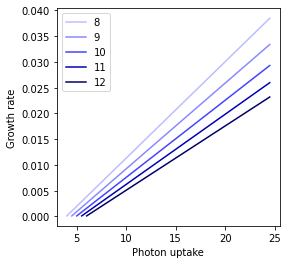

In [24]:
fig, ax = plt.subplots(figsize = (4,4))
for idx in df_psquantum.index:
    ax.plot(df_psquantum.columns,df_psquantum.loc[idx],label=idx,c=dico_col[idx])

plt.legend()
plt.xlabel("Photon uptake")
plt.ylabel("Growth rate")
plt.savefig("psquantum_sensibility_BOF_blue.pdf",format="pdf",dpi=1500)
plt.savefig("psquantum_sensibility_BOF_blue.png",format="png",dpi=1500)
plt.savefig("psquantum_sensibility_BOF_blue.svg",format="svg",dpi=1500)
plt.show()

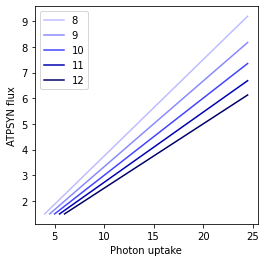

In [25]:
fig, ax = plt.subplots(figsize = (4,4))
for idx in df_psquantum.index:
    ax.plot(df_atpsyn.columns,df_atpsyn.loc[idx],label=idx,c=dico_col[idx])

plt.legend()
plt.xlabel("Photon uptake")
plt.ylabel("ATPSYN flux")
plt.savefig("psquantum_sensibility_BOF_ATPSYN_blue.pdf",format="pdf",dpi=1500)
plt.savefig("psquantum_sensibility_BOF_ATPSYN_blue.png",format="png",dpi=1500)
plt.savefig("psquantum_sensibility_BOF_ATPSYN_blue.svg",format="svg",dpi=1500)

plt.show()

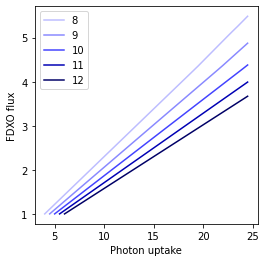

In [26]:
fig, ax = plt.subplots(figsize = (4,4))
for idx in df_psquantum.index:
    ax.plot(df_fdxo.columns,df_fdxo.loc[idx],label=idx,c=dico_col[idx])

plt.legend()
plt.xlabel("Photon uptake")
plt.ylabel("FDXO flux")
plt.savefig("psquantum_sensibility_BOF_FDXO_blue.pdf",format="pdf",dpi=1500)
plt.savefig("psquantum_sensibility_BOF_FDXO_blue.png",format="png",dpi=1500)
plt.savefig("psquantum_sensibility_BOF_FDXO_blue.svg",format="svg",dpi=1500)

plt.show()

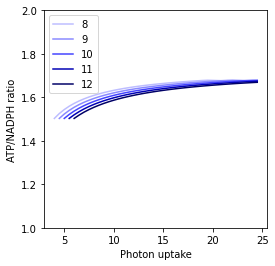

In [27]:
fig, ax = plt.subplots(figsize = (4,4))
for idx in df_psquantum.index:
    ax.plot(df_ratio_atp_nadph.columns,df_ratio_atp_nadph.loc[idx],label=idx,c=dico_col[idx])

plt.legend()
plt.xlabel("Photon uptake")
plt.ylabel("ATP/NADPH ratio")
plt.ylim((1,2))
plt.savefig("psquantum_sensibility_BOF_ratio_atp_nadph_blue.pdf",format="pdf",dpi=1500)
plt.savefig("psquantum_sensibility_BOF_ratio_atp_nadph_blue.png",format="png",dpi=1500)
plt.savefig("psquantum_sensibility_BOF_ratio_atp_nadph_blue.svg",format="svg",dpi=1500)

plt.show()